In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [19]:
diamonds_test = pd.read_csv('./diamonds_test.csv')
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [20]:
database = './diamonds_train.db'
connection = sql.connect(database)

In [21]:
query = '''SELECT tr.index_id, c.clarity, cl.color, ct.cut, dm.depth, dm.'table', dm.x, dm.y, dm.z, tr.price, ci.city, tr.carat
FROM diamonds_properties pr
   INNER JOIN diamonds_clarity c ON pr.clarity_id = c.clarity_id 
   INNER JOIN diamonds_color cl on pr.color_id = cl.color_id 
   INNER JOIN diamonds_cut ct on pr.cut_id = ct.cut_id 
   INNER JOIN diamonds_dimensions dm on pr.index_id = dm.index_id
   INNER JOIN diamonds_transactional tr on pr.index_id = tr.index_id
   INNER JOIN diamonds_city ci on tr.city_id = ci.city_id'''

In [22]:
diamonds_train= pd.read_sql_query(query,connection)
diamonds_train

,index_id,clarity,color,cut,depth,table,x,y,z,price,city,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,58.0,6.83,6.79,4.25,4268,Dubai,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,VS2,H,Very Good,63.0,57.0,4.35,4.38,2.75,505,Kimberly,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,VS1,G,Fair,65.5,55.0,5.62,5.53,3.65,2686,Las Vegas,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,SI1,D,Good,63.8,56.0,4.68,4.72,3.00,738,Kimberly,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,SI1,G,Ideal,60.5,59.0,6.55,6.51,3.95,4882,Dubai,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,VS1,G,Ideal,62.7,57.0,7.10,7.04,4.43,10070,Antwerp,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,SI2,F,Good,57.1,60.0,8.31,8.25,4.73,12615,Madrid,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,SI1,H,Ideal,62.7,56.0,6.37,6.42,4.01,5457,Kimberly,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,VS1,J,Ideal,61.9,54.3,4.45,4.47,2.76,456,Kimberly,0.33


In [23]:
 #diamonds_train = diamonds_sql.to_csv("./diamonds_train.csv")

In [24]:
target = "price"
cat_features = ["cut", "color", "clarity", "city"]
num_features = ["carat", "depth", "table", "x", "y", "z"]
#num_features = ["carat"]

In [25]:
#for i in cat_features:
    #diamonds_train[i] = diamonds_train[i].astype("category")
    #diamonds_test[i] = diamonds_test[i].astype("category")

C:\Users\nelso\miniconda32\envs\sklearn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

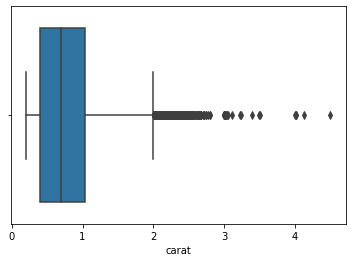

In [26]:
import seaborn as sns
sns.boxplot(diamonds_train['carat'])

In [41]:
diamonds_train.drop(train_df[train_df["carat"]>=3.5].index,axis=0,inplace=True)
diamonds_train= diamonds_train.reset_index(drop=True)

In [42]:
cat_df_train = pd.get_dummies(diamonds_train[cat_features])
num_df_train = diamonds_train.loc[:, num_features]
train_df = pd.concat([cat_df_train, num_df_train], axis = 1)
train_df['id'] = train_df.index
train_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,city_Surat,city_Tel Aviv,city_Zurich,carat,depth,table,x,y,z,id
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1.21,62.4,58.0,6.83,6.79,4.25,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0.32,63.0,57.0,4.35,4.38,2.75,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0.71,65.5,55.0,5.62,5.53,3.65,2
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0.41,63.8,56.0,4.68,4.72,3.00,3
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1.02,60.5,59.0,6.55,6.51,3.95,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40443,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1.34,62.7,57.0,7.10,7.04,4.43,40443
40444,0,1,0,0,0,0,0,1,0,0,...,0,0,0,2.02,57.1,60.0,8.31,8.25,4.73,40444
40445,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1.01,62.7,56.0,6.37,6.42,4.01,40445
40446,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.33,61.9,54.3,4.45,4.47,2.76,40446


In [43]:
cat_df_test = pd.get_dummies(diamonds_test[cat_features])
num_df_test = diamonds_test.loc[:, num_features]
test_df = pd.concat([cat_df_test, num_df_test], axis = 1)
test_df['id'] = test_df.index
test_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,city_Surat,city_Tel Aviv,city_Zurich,carat,depth,table,x,y,z,id
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0.79,62.7,60.0,5.82,5.89,3.67,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1.20,61.0,57.0,6.81,6.89,4.18,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1.57,62.2,61.0,7.38,7.32,4.57,2
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0.90,63.8,54.0,6.09,6.13,3.90,3
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0.50,62.9,58.0,5.05,5.09,3.19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0.57,61.9,56.0,5.35,5.32,3.30,13480
13481,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.71,62.2,55.0,5.71,5.73,3.56,13481
13482,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0.70,61.6,55.0,5.75,5.71,3.53,13482
13483,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0.70,58.8,57.0,5.85,5.89,3.45,13483


In [44]:
features = list(cat_df_train.columns) + list(num_df_train.columns)
features 

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'city_Amsterdam',
 'city_Antwerp',
 'city_Dubai',
 'city_Kimberly',
 'city_Las Vegas',
 'city_London',
 'city_Luxembourg',
 'city_Madrid',
 'city_New York City',
 'city_Paris',
 'city_Surat',
 'city_Tel Aviv',
 'city_Zurich',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z']

In [45]:
scaler = StandardScaler()
x = scaler.fit_transform(train_df.loc[:,features].values)
y= diamonds_train[target]

In [46]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)
#print(f"X_train: {X_train.shape}, X_test: {X_validation.shape}, y_train: {y_train.shape}, y_test: {y_validation.shape}")

In [47]:
model= RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
X_test = scaler.transform(test_df.loc[:,features].values)

In [49]:
scores = cross_val_score(model, 
                         X_train, 
                         y_train, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5,
                         n_jobs=-1)

print(type(model), '\n')
print(scores, '\n')
print(np.mean(-scores), '\n')

<class 'sklearn.ensemble._forest.RandomForestRegressor'> 

[-577.4679139  -574.91783062 -557.66192898 -580.3429182  -567.26778291] 

571.5316749218676 



In [50]:
#y_pre = model.predict(X_validation).clip(0,30000)

In [53]:
y_pre = model.predict(X_test).clip(0,30000)

In [54]:
rmse = mean_squared_error(y_validation, y_pre)**0.5
rmse

ValueError: Found input variables with inconsistent numbers of samples: [8090, 13485]

In [55]:
#submission = pd.DataFrame({'id': [i for i in range(0,len(y_pre))], 'price': y_pre})
submission = pd.DataFrame({'id': test_df['id'], 'price': y_pre})
submission.to_csv("submission5.csv", index = False)

In [77]:
## submission

In [ ]:
'''model = linear_model.Lasso()
#model = ElasticNet()
#model = Ridge()
#model = SVR()
#model = SGDRegressor()
#model = LinearRegression()
hyperparameters = model.get_params()
model = RandomForestRegressor()
model_2 = DecisionTreeClassifier()
#model_3 = LogisticRegression(random_state=0)
#model_4 = svm.SVC()
#model_5 =  NearestNeighbors(n_neighbors=2, algorithm='ball_tree')'''

In [ ]:
#X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size =0.2, ramdon_state = 42)